# Quick-start with the MNIST digits dataset

    This tutorial covers a quick-start with TopOMetry using the MNIST handwritten digits dataset. This is composed of ~1,800 handwritten digits images composed of 64 (8 x 8) pixels each. Our task will be to represent this high-dimensional space (of 64 dimensions) into latent orthogonal bases and to visualize comprehensive layouts of this data.
    
    First, we'll load some libraries:

In [1]:
# Load some libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse import csr_matrix
import topo as tp
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
%matplotlib inline

    Next, we'll load the MNIST handwritten digits dataset from scikit-learn:

In [2]:
# Load the digits data
digits = load_digits()

# Convert to sparse for even more speed
data = csr_matrix(digits.data)

    Then, we'll create an empty TopOGraph object to perform our analyses. The TopOGraph class is the main class used in TopOMetry to coordinate analyses between the multiple other classes available in the library. The TopOGraph can learn similarities, new orthogonal bases and affinity graphs with any pairwise combination of three algorithms: Diffusion Maps, Continuous-k-Nearest Neighbors and fuzzy simplicial sets, rendering 9 model options (3 bases x 3 graphs). By default, the TopOGraph runs the 'diffusion' basis and the 'diff' graph.  

In [3]:
# Set up a TopOGraph object:
tg = tp.TopOGraph(n_jobs=12, base_metric='euclidean', graph_metric='euclidean')

# Fit a topological orthogonal basis:
tg.fit(data)

# Fit a topological graph:
db_diff_graph = tg.transform()

Computing neighborhood graph...
 Base kNN graph computed in 0.239954 (sec)
Building topological basis...using diffusion model.


/home/davi/.local/lib/python3.9/site-packages/kneed/knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


 Topological basis fitted with multiscale self-adaptive diffusion maps in 2.158306 (sec)
    Building topological graph...
     Topological `diff` graph extracted in = 0.456512 (sec)


We'll perform the first visualization with [PaCMAP](http://jmlr.org/papers/v22/20-1061.html) (Pairwise-controlled 
Manifold Approximation and Projection) , one of the 6 graph layout optimization methods included in TopOMetry. The other methods are:

* MAP (Manifold Approximation and Projection) - a lighter 
[UMAP](https://umap-learn.readthedocs.io/en/latest/index.html) with looser assumptions
* [tSNE](https://github.com/DmitryUlyanov/Multicore-TSNE) (t-Stochasthic Neighborhood Embedding) - a classic of visualization, with parallelization
* [MDE](https://github.com/cvxgrp/pymde) (Minimum Distortion Embedding) - the ultimate swiss-army knife for graph layout optimization
* [TriMAP](https://github.com/eamid/trimap) - dimensionality reduction using triplets
* [NCVis](https://github.com/stat-ml/ncvis) (Noise Contrastive Visualization) - for blazing fast performance


In [4]:
db_PaCMAP = tg.PaCMAP(num_iters=1000)

         Spectral layout not stored at TopOGraph.SpecLayout. Trying to compute...


/home/davi/.local/lib/python3.9/site-packages/pacmap/pacmap.py:383: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if Yinit is None or Yinit == "pca":
/home/davi/.local/lib/python3.9/site-packages/pacmap/pacmap.py:389: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif Yinit == "random":


         Obtained PaCMAP embedding in = 154.299647 (sec)


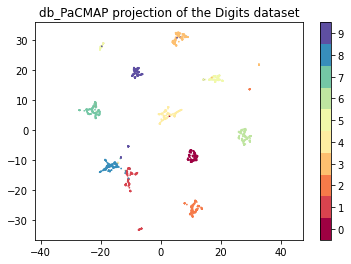

In [5]:
plt.scatter(db_PaCMAP[:, 0], db_PaCMAP[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_PaCMAP projection of the Digits dataset', fontsize=12);

Now let's check how other layouts look:

In [6]:
# TriMAP, tSNE and NCVis use only the basis, not the graph
emb_db_trimap = tg.TriMAP()
emb_db_tsne = tg.tSNE()
emb_db_ncvis = tg.NCVis()

# MAP and MDE also use graph data
emb_db_diff_map = tg.MAP()
emb_db_diff_mde = tg.MDE()

         Obtained TriMAP embedding in = 53.604571 (sec)
         Obtained tSNE embedding in = 13.020418 (sec)
         Obtained NCVis embedding in = 6.237944 (sec)
         Optimized MAP embedding in = 19.570823 (sec)
         Obtained MDE embedding in = 3.368821 (sec)


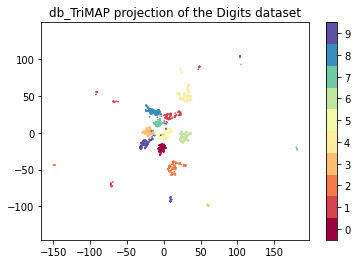

In [7]:
plt.scatter(emb_db_trimap[:, 0], emb_db_trimap[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_TriMAP projection of the Digits dataset', fontsize=12);

Text(0.5, 1.0, 'db_tSNE projection of the Digits dataset')

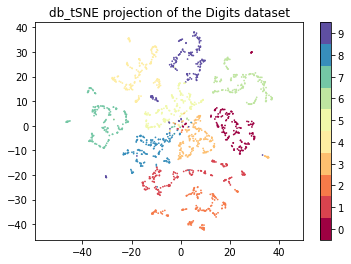

In [8]:
plt.scatter(emb_db_tsne[:, 0], emb_db_tsne[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_tSNE projection of the Digits dataset', fontsize=12)

Text(0.5, 1.0, 'db_NCVis projection of the Digits dataset')

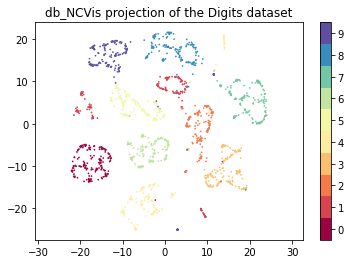

In [9]:
plt.scatter(emb_db_ncvis[:, 0], emb_db_ncvis[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_NCVis projection of the Digits dataset', fontsize=12)

Text(0.5, 1.0, 'db_diff_MAP projection of the Digits dataset')

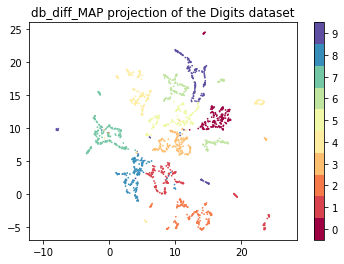

In [10]:
plt.scatter(emb_db_diff_map[:, 0], emb_db_diff_map[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_diff_MAP projection of the Digits dataset', fontsize=12)

Text(0.5, 1.0, 'db_diff_MDE projection of the Digits dataset')

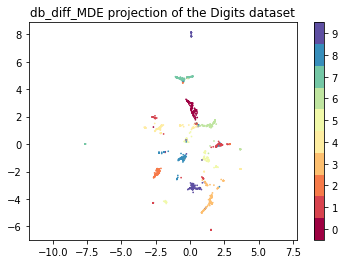

In [11]:
plt.scatter(emb_db_diff_mde[:, 0], emb_db_diff_mde[:, 1], c=digits.target.astype('int32'), cmap='Spectral', s=0.5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('db_diff_MDE projection of the Digits dataset', fontsize=12)

That's it for this tutorial!